In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import pdist, squareform
import ps3_implementation
import warnings
warnings.filterwarnings('ignore')


mat = sio.loadmat('../data/qm7.mat')
print(mat.keys())


dict_keys(['__header__', '__version__', '__globals__', 'X', 'R', 'Z', 'T', 'P'])


In [2]:
# reformat the data
X = mat['X']
Y = mat['T'].T
x, _ = np.linalg.eig(X)

x = np.sort(x, axis=1)[:,::-1]

### (1) Plot the distances || xi − xj || against the absolute difference of energies | yi − yj | for all pairs of data points.

In [3]:
distX = np.linalg.norm(x-x[:,None], axis=-1)
distY = np.linalg.norm(Y-Y[:,None], axis=-1)
print(distX.shape, distY.shape)
# Step 1: Compute pairwise Euclidean distances between data points
pairwise_distances = pdist(x, metric='euclidean')
distance_matrix = squareform(pairwise_distances)

# Step 2: Compute absolute differences in energies between data points
pairwise_energy_differences = pdist(Y, metric='cityblock')
energy_diff_matrix = squareform(pairwise_energy_differences)

# Step 3: Prepare data for plotting
distances = pairwise_distances
energy_differences = pairwise_energy_differences



(7165, 7165) (7165, 7165)


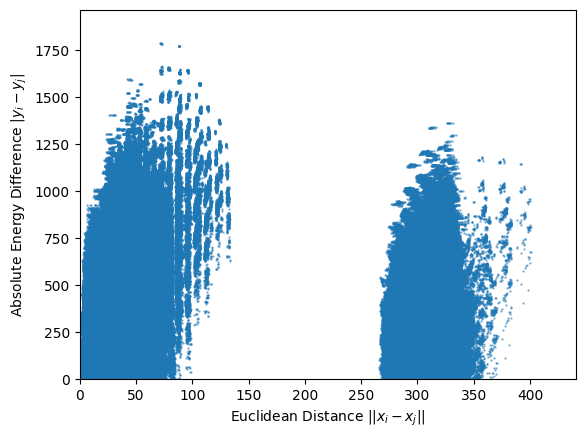

In [14]:
# Step 4: Plotting
plt.scatter(distances, energy_differences, alpha=0.5, s=0.5)
plt.xlabel('Euclidean Distance $||x_i - x_j||$')
plt.ylabel('Absolute Energy Difference $|y_i - y_j|$')
plt.ylim([0, np.max(energy_differences)*1.1])
plt.xlim([0, np.max(pairwise_distances)*1.1])
plt.savefig('distance_vs_energy_difference.png')
plt.show()

### (2) Shuffle the data randomly and fix a train/test split of size 5000/2165

In [5]:
trainX, testX, trainY, testY = train_test_split(x, Y, test_size=2165, random_state=0)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(5000, 23) (2165, 23) (5000, 1) (2165, 1)


### (3) Use fivefold cross-validation to estimate on 2500 random training samples:

#### (a) Width parameter σ of the Gaussian kernel. Candidates are quantiles of pairwise Euclidean distances.

In [15]:
i = np.random.choice(trainX.shape[0], size=2500, replace=False)
newX = trainX[i]
newY = trainY[i]
# Define candidates for σ (Gaussian kernel width)
sigma_candidates = np.percentile(pairwise_distances, [0, 25, 50, 75, 100])

params = {'kernel': ['gaussian'], 'kernelparameter': sigma_candidates,
                  'regularization': np.logspace(-7, 0, 8)}

In [16]:
krr = ps3_implementation.krr
best_model = ps3_implementation.cv(newX,newY,krr,params,nfolds=5, nrepetitions=1)

In [17]:
# Output the best parameters
best_regularization = best_model.regularization
best_kernel = best_model.kernel
best_kernel_parameter = best_model.kernelparameter
print(best_regularization, best_kernel_parameter)

0.001 31.825927906202132


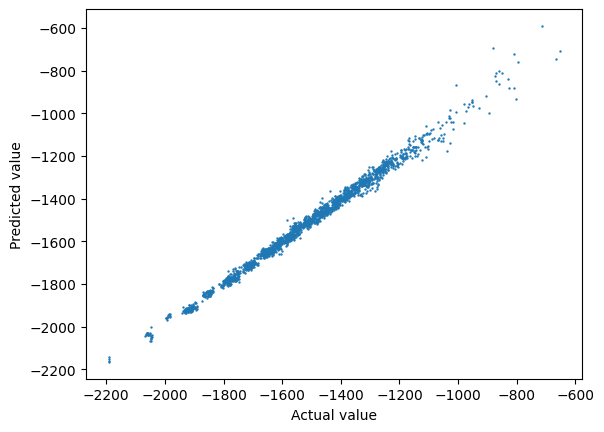

In [9]:
best_model.kernelparameter = best_kernel_parameter
best_model.regularization = best_regularization
best_model.fit(trainX,trainY)
predY = best_model.predict(testX)
plt.scatter(testY,predY, s=0.5)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.savefig('optimal_parameters.png')
plt.show()

In [10]:
best_model.regularization = best_regularization
MAE = []
for n in np.arange(100,5100,100):
    i = np.random.choice(trainX.shape[0], size=n, replace=False)
    newX = trainX[i]
    newY = trainY[i]
    best_model.fit(newX, newY)
    pY = best_model.predict(testX)
    MAE.append(ps3_implementation.mean_absolute_error(testY, pY))

In [11]:
best_model.X_train.shape

(5000, 23)

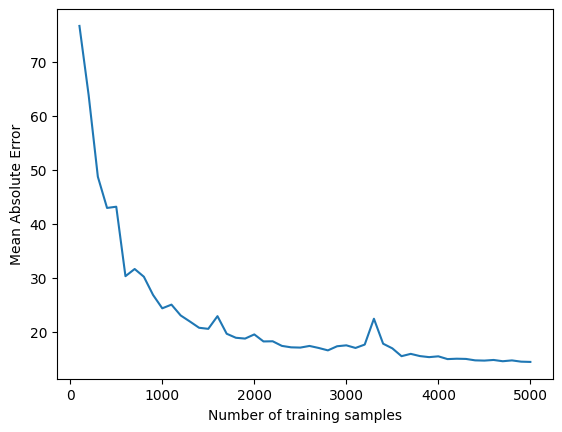

In [12]:
plt.plot(np.arange(100,5100,100), MAE)
plt.xlabel('Number of training samples')
plt.ylabel('Mean Absolute Error')
plt.savefig('mean_absolute_error.png')
plt.show()

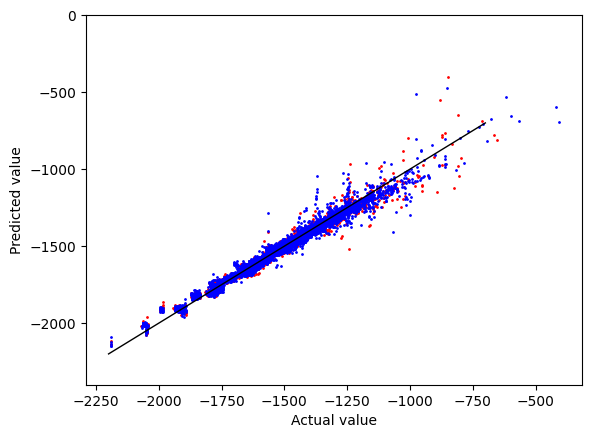

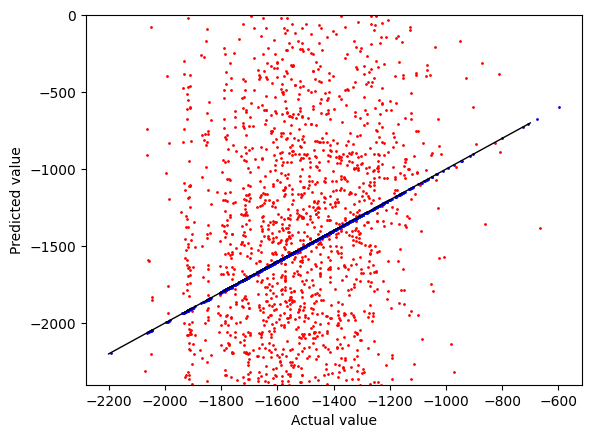

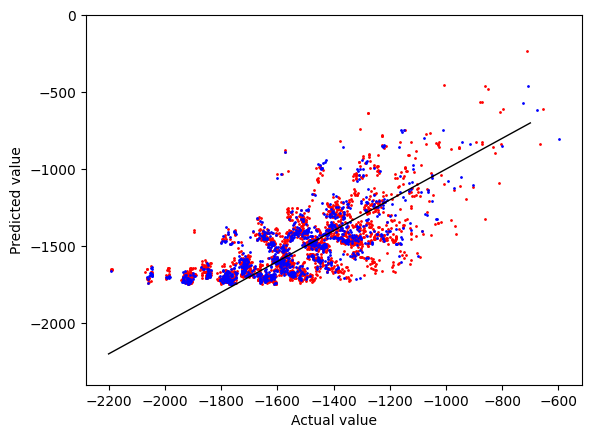

In [21]:
krr = ps3_implementation.krr
krr.kernel = "gaussian"
i = np.random.choice(trainX.shape[0], size=1000, replace=False)
newX = trainX[i]
newY = trainY[i]
best_model.kernelparameter = best_kernel_parameter
best_model.regularization = best_regularization
best_model.fit(newX,newY)
predYtest = best_model.predict(testX)
predYtrain = best_model.predict(trainX)
plt.plot((-2200,-700), (-2200,-700), color='black', linewidth=1)
plt.scatter(testY, predYtest,c="red", s=1)
plt.scatter(trainY, predYtrain, c="blue", s=1)
plt.ylim(-2400,0)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.savefig("scatter_plots1.png")
plt.show()
best_model.regularization = 0
best_model.fit(newX,newY)
predYtest = best_model.predict(testX)
predYtrain = best_model.predict(newX)
plt.plot((-2200,-700), (-2200,-700), color='black', linewidth=1)
plt.scatter(testY, predYtest,c="red", s=1)
plt.scatter(newY, predYtrain, c="blue", s=1)
plt.ylim(-2400,0)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.savefig("scatter_plots2.png")
plt.show()
best_model.regularization = 10
best_model.fit(newX,newY)
predYtest = best_model.predict(testX)
predYtrain = best_model.predict(newX)
plt.plot((-2200,-700), (-2200,-700), color='black', linewidth=1)
plt.scatter(testY, predYtest,c="red", s=1)
plt.scatter(newY, predYtrain, c="blue", s=1)
plt.ylim(-2400,0)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.savefig("scatter_plots3.png")
plt.show()